Market basket analysis is a data mining technique used to discover relationships between items that are frequently purchased together. By analyzing large datasets of customer transactions, businesses can identify patterns and associations, such as the likelihood of a customer buying milk and bread at the same time. These insights are then used to make strategic decisions about product placement, promotions, and cross-selling opportunities to increase sales and improve customer experience.

In [1]:
# Bring in data

import pandas as pd
df = pd.read_csv("/content/Market_Basket.csv")

In [5]:
# Remove empty strings from the lists
from collections import defaultdict

transactions = [[item for item in transaction if item] for transaction in transactions]

# Count frequency of each item
item_counts = defaultdict(int)
for transaction in transactions:
    for item in transaction:
        item_counts[item] += 1

# Convert to a DataFrame for easier analysis and sort
item_counts_df = pd.DataFrame(list(item_counts.items()), columns=['item', 'count'])
item_counts_df = item_counts_df.sort_values('count', ascending=False)

# Get the total number of transactions
num_transactions = len(transactions)

# Calculate support for each item
item_counts_df['support'] = item_counts_df['count'] / num_transactions

print("Top 10 most frequent items:")
print(item_counts_df.head(10))

# Now, let's find co-occurrence counts for pairs of items.
# We will focus on pairs containing the most frequent item, 'mineral water'.
frequent_item = 'mineral water'
co_occurrence_counts = defaultdict(int)
for transaction in transactions:
    if frequent_item in transaction:
        for item in transaction:
            if item != frequent_item:
                co_occurrence_counts[item] += 1

co_occurrence_df = pd.DataFrame(list(co_occurrence_counts.items()), columns=['item', 'co_occurrence_count'])
co_occurrence_df = co_occurrence_df.sort_values('co_occurrence_count', ascending=False)

# Calculate confidence and lift for rules like {X} -> {mineral water}
# Confidence(X -> mineral water) = P(mineral water | X) = count(X and mineral water) / count(X)
# Lift(X -> mineral water) = Confidence(X -> mineral water) / P(mineral water)
# P(mineral water) is the support of 'mineral water'

# Get support for 'mineral water'
mineral_water_support = item_counts_df[item_counts_df['item'] == 'mineral water']['support'].iloc[0]

# Calculate confidence and lift
co_occurrence_df = pd.merge(co_occurrence_df, item_counts_df, on='item')
co_occurrence_df['confidence'] = co_occurrence_df['co_occurrence_count'] / co_occurrence_df['count']
co_occurrence_df['lift'] = co_occurrence_df['confidence'] / mineral_water_support

print(f"\nCo-occurrence with '{frequent_item}':")
print(co_occurrence_df.head(10))

Top 10 most frequent items:
                 item  count   support
6       mineral water   1787  0.238267
2                eggs   1348  0.179733
18          spaghetti   1306  0.174133
13       french fries   1282  0.170933
25          chocolate   1230  0.164000
10          green tea    990  0.132000
7                milk    972  0.129600
48        ground beef    737  0.098267
17  frozen vegetables    715  0.095333
42           pancakes    713  0.095067

Co-occurrence with 'mineral water':
                item  co_occurrence_count  count   support  confidence  \
0          spaghetti                  448   1306  0.174133    0.343032   
1          chocolate                  396   1230  0.164000    0.321951   
2               eggs                  382   1348  0.179733    0.283383   
3               milk                  360    972  0.129600    0.370370   
4        ground beef                  307    737  0.098267    0.416554   
5  frozen vegetables                  268    715  0.095333    

The Market Basket Analysis of the provided dataset reveals several interesting purchasing patterns. The most frequently purchased item is mineral water, followed by eggs, spaghetti, and french fries. This suggests these are staple items for many customers.

Further analysis shows strong associations between mineral water and other products. For instance, customers who purchase ground beef are 1.75 times more likely to also buy mineral water than the average customer, indicating a strong co-purchase tendency. Similarly, there are notable associations between mineral water and milk, and mineral water and frozen vegetables, suggesting these items are frequently bought together. These insights can be valuable for in-store product placement and promotional strategies.

/tmp/ipython-input-6-1732136609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='item', data=item_counts_df.head(10), palette='viridis')


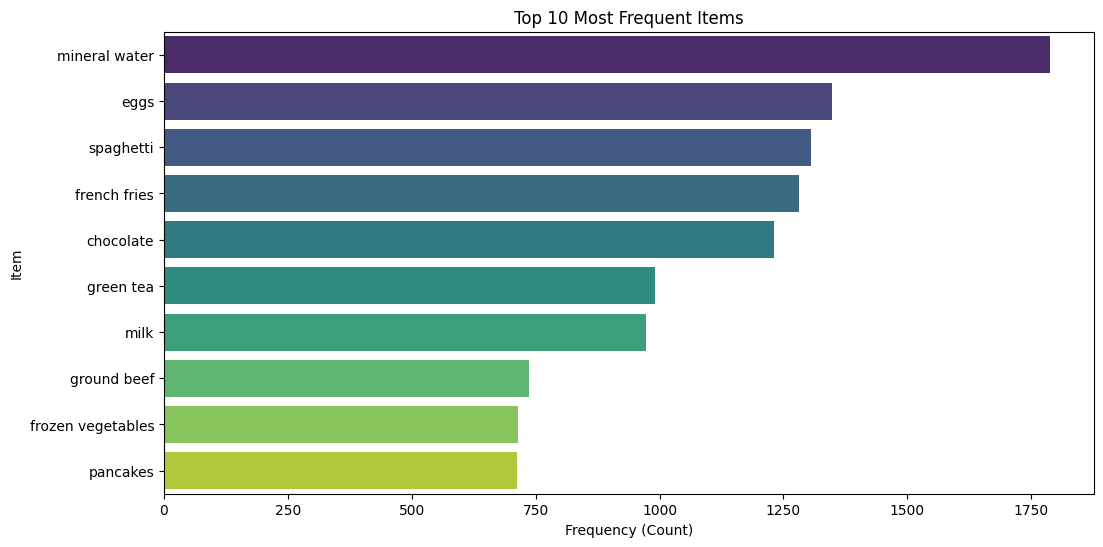

/tmp/ipython-input-6-1732136609.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='co_occurrence_count', y='item', data=co_occurrence_df.head(10), palette='viridis')


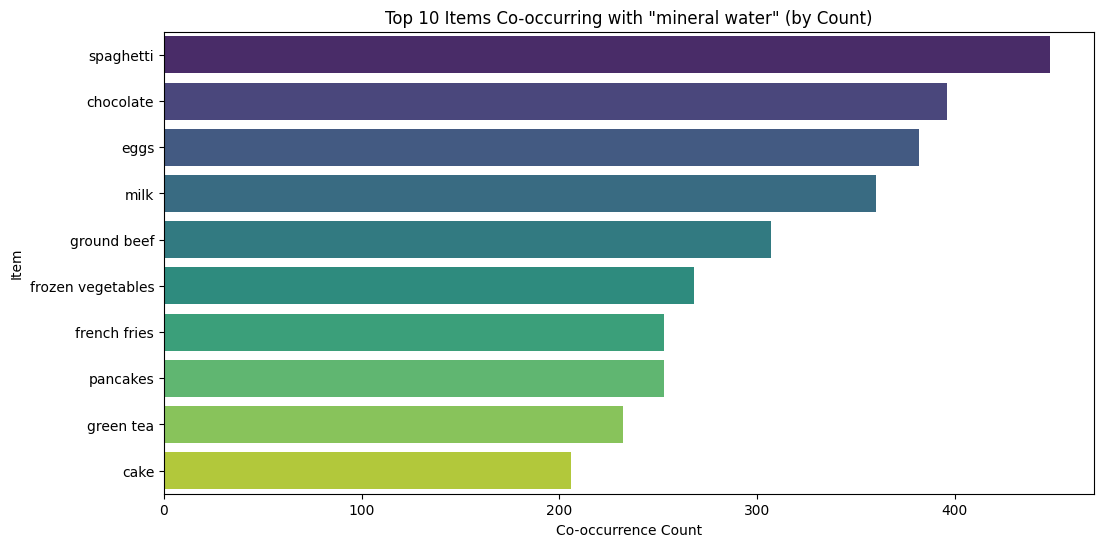

/tmp/ipython-input-6-1732136609.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='item', data=co_occurrence_df.sort_values('lift', ascending=False).head(10), palette='viridis')


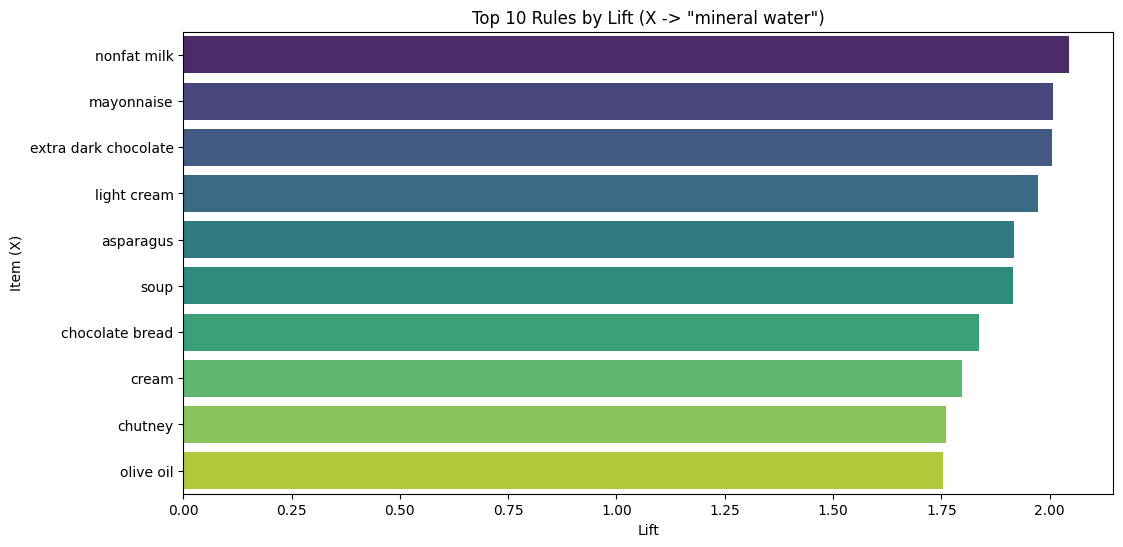

/tmp/ipython-input-6-1732136609.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence', y='item', data=co_occurrence_df.sort_values('confidence', ascending=False).head(10), palette='viridis')


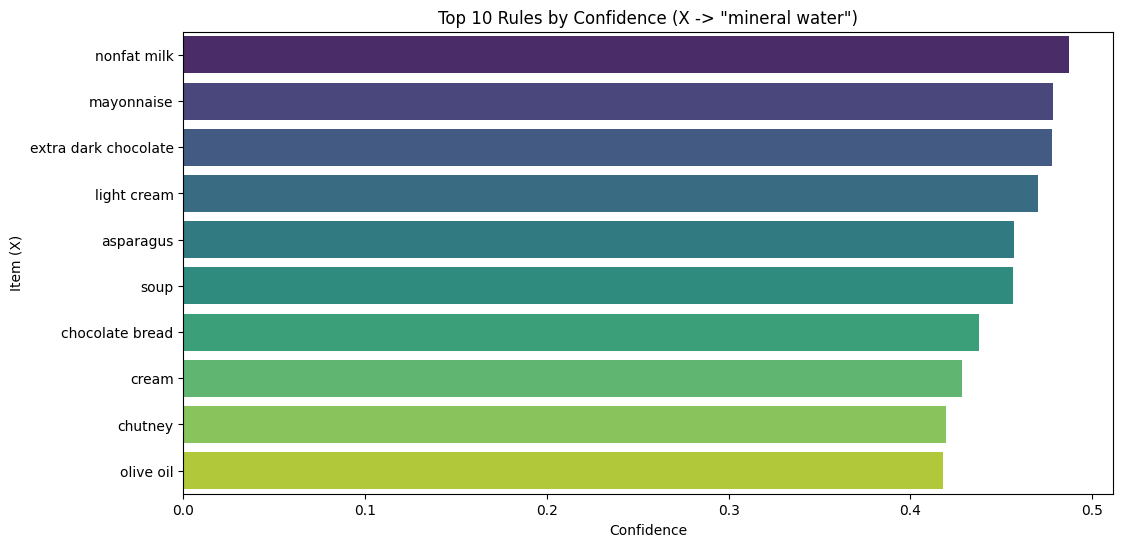

In [6]:
# Create charts

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 most frequent items
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='item', data=item_counts_df.head(10), palette='viridis')
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Frequency (Count)')
plt.ylabel('Item')
plt.show()

# Plotting the top 10 items that co-occur with 'mineral water' by count
plt.figure(figsize=(12, 6))
sns.barplot(x='co_occurrence_count', y='item', data=co_occurrence_df.head(10), palette='viridis')
plt.title(f'Top 10 Items Co-occurring with "{frequent_item}" (by Count)')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Item')
plt.show()

# Plotting the top 10 rules by lift (for rules {X} -> {mineral water})
plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='item', data=co_occurrence_df.sort_values('lift', ascending=False).head(10), palette='viridis')
plt.title(f'Top 10 Rules by Lift (X -> "{frequent_item}")')
plt.xlabel('Lift')
plt.ylabel('Item (X)')
plt.show()

# Plotting the top 10 rules by confidence (for rules {X} -> {mineral water})
plt.figure(figsize=(12, 6))
sns.barplot(x='confidence', y='item', data=co_occurrence_df.sort_values('confidence', ascending=False).head(10), palette='viridis')
plt.title(f'Top 10 Rules by Confidence (X -> "{frequent_item}")')
plt.xlabel('Confidence')
plt.ylabel('Item (X)')
plt.show()